In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
Fish = pd.read_csv("garments_worker_productivity.csv")
Fish.head()

Saving garments_worker_productivity.csv to garments_worker_productivity (2).csv


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
Fish.info() #информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
Fish['actual_productivity'].value_counts() #Сколько какое значение ввстречается в датафрейме

0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: actual_productivity, Length: 879, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

label_encoder.fit(Fish['date']) 
Fish['date'] = label_encoder.transform(Fish['date']) 

label_encoder.fit(Fish['wip']) 
Fish['wip'] = label_encoder.transform(Fish['wip']) 

label_encoder.fit(Fish['quarter']) 
Fish['quarter'] = label_encoder.transform(Fish['quarter']) 

label_encoder.fit(Fish['department']) 
Fish['department'] = label_encoder.transform(Fish['department']) 

label_encoder.fit(Fish['day']) 
Fish['day'] = label_encoder.transform(Fish['day']) 
Fish.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,2,3,8,0.80,26.16,327,7080,98,0.0,0,0,59.0,0.940725
1,0,0,1,3,1,0.75,3.94,548,960,0,0.0,0,0,8.0,0.886500
2,0,0,2,3,11,0.80,11.41,246,3660,50,0.0,0,0,30.5,0.800570
3,0,0,2,3,12,0.80,11.41,246,3660,50,0.0,0,0,30.5,0.800570
4,0,0,2,3,6,0.80,25.90,366,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
Fish.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
X = Fish[['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity']].values

y = Fish['actual_productivity'].values

In [ ]:
features = pd.Series(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'])
features

0                      date
1                   quarter
2                department
3                       day
4                      team
5     targeted_productivity
6                       smv
7                       wip
8                 over_time
9                 incentive
10                idle_time
11                 idle_men
12       no_of_style_change
13            no_of_workers
14      actual_productivity
dtype: object

In [ ]:
from sklearn.linear_model import LinearRegression
# Создадим модель линейной регрессии
slr = LinearRegression()

# Применим линейную регрессию к нашему набору данных 
slr.fit(X, y)

# сохраним признаки в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,3.534186e-18,date
1,2.457751e-16,quarter
2,3.900524e-17,department
3,-3.419803e-17,day
4,2.093377e-17,team
5,-9.355360e-17,targeted_productivity
6,-1.163260e-17,smv
7,-7.132547e-19,wip
8,-2.015938e-19,over_time
9,-1.132536e-18,incentive


In [ ]:
# выделим вектор признака и вектор ответов
X = Fish[['targeted_productivity']].values
y = Fish['actual_productivity'].values

# создадим модель линейной регрессии
slr = LinearRegression()

slr.fit(X, y)

y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [0.7514793]
Intercept: 0.1867874383341922


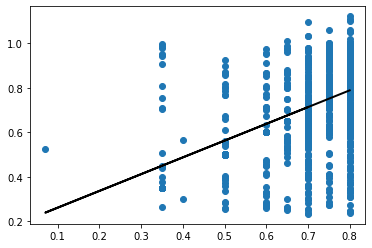

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='black', linewidth=2)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error #Она считает точность За счет квадрата расстояния программы, чем ближе к нулю, тем лучше

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 0.025


очень хорошее значение, тк оно приближено к нулю. 
